In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [8]:
data = pd.read_csv('/content/drive/My Drive/dataset/spotify_dataset/spotify_2023.csv',encoding= 'latin1')
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


### Check for Data Incosistency:

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [10]:
data.isna().sum()

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0


<font color="red">Issue1: </font><font color="green">'in_shazam_charts' and 'key', both has missing value.</font>

In [13]:
cat_col = data.select_dtypes(include = ['object'])
num_col = data.select_dtypes(exclude = ['object'])
cat_col


,track_name,artist(s)_name,streams,in_deezer_playlists,in_shazam_charts,key,mode
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",141381703,45,826,B,Major
1,LALA,Myke Towers,133716286,58,382,C#,Major
2,vampire,Olivia Rodrigo,140003974,91,949,F,Major
3,Cruel Summer,Taylor Swift,800840817,125,548,A,Major
4,WHERE SHE GOES,Bad Bunny,303236322,87,425,A,Minor
...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,91473363,37,0,A,Major
949,Bigger Than The Whole Sky,Taylor Swift,121871870,8,0,F#,Major
950,A Veces (feat. Feid),"Feid, Paulo Londra",73513683,7,0,C#,Major
951,En La De Ella,"Feid, Sech, Jhayco",133895612,17,0,C#,Major


<font color="red">Issue2: </font><font color="green">Here in 'streams' 'in_deezer_playlists' 'in_shazam_charts' column values are numeric but represented under categorical column.</font>

In [14]:
num_col

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,2,2023,7,14,553,147,43,263,10,125,80,89,83,31,0,8,4
1,1,2023,3,23,1474,48,48,126,14,92,71,61,74,7,0,10,4
2,1,2023,6,30,1397,113,94,207,14,138,51,32,53,17,0,31,6
3,1,2019,8,23,7858,100,116,207,12,170,55,58,72,11,0,11,15
4,1,2023,5,18,3133,50,84,133,15,144,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,1,2022,11,3,953,0,61,13,1,144,60,24,39,57,0,8,3
949,1,2022,10,21,1180,0,4,0,0,166,42,7,24,83,1,12,6
950,2,2022,11,3,573,0,2,0,0,92,80,81,67,4,0,8,6
951,3,2022,10,20,1320,0,29,26,0,97,82,67,77,8,0,12,5


### Datatype Convertion :

In [15]:
data['streams'].unique()


array(['141381703', '133716286', '140003974', '800840817', '303236322',
       '183706234', '725980112', '58149378', '95217315', '553634067',
       '505671438', '58255150', '1316855716', '387570742', '2513188493',
       '1163093654', '496795686', '30546883', '335222234', '363369738',
       '86444842', '52135248', '1297026226', '200647221', '115364561',
       '78300654', '899183384', '61245289', '429829812', '127408954',
       '22581161', '52294266', '843957510', '999748277', '618990393',
       '123122413', '188933502', '1355959075', '786181836', '176553476',
       '354495408', '2808096550', '1109433169', '1047101291', '65156199',
       '570515054', '1085685420', '1647990401', '2565529693', '518745108',
       '107753850', '177740666', '153372011', '57876440', '1813673666',
       '3703895074', '256483385', '1214083358', '16011326', '812019557',
       '111947664', '156338624', '720434240', '357925728', '674072710',
       '1755214421', '404562836', '373199958', '14780425', '395

In [18]:
data['in_shazam_charts'].unique()

array(['826', '382', '949', '548', '425', '946', '418', '194', '953',
       '339', '251', '168', '1,021', '1,281', nan, '187', '0', '1,173',
       '29', '150', '73', '139', '1,093', '96', '211', '325', '294',
       '197', '27', '310', '354', '184', '212', '81', '82', '100', '62',
       '69', '727', '311', '1,133', '102', '332', '259', '140', '16',
       '110', '810', '176', '615', '210', '216', '215', '167', '37',
       '171', '272', '529', '26', '5', '169', '230', '84', '154', '93',
       '115', '72', '8', '323', '49', '1,451', '1,170', '429', '162',
       '10', '478', '236', '200', '78', '266', '486', '204', '34', '202',
       '312', '32', '153', '519', '458', '48', '666', '14', '925', '88',
       '203', '44', '74', '638', '64', '71', '2', '3', '136', '148', '22',
       '368', '1', '189', '52', '9', '31', '66', '208', '28', '558',
       '195', '13', '60', '503', '56', '15', '454', '40', '285', '129',
       '58', '117', '47', '20', '30', '80', '263', '116', '57', '39',
  

In [19]:
def prep(data):
  data['streams'] = pd.to_numeric(data['streams'].astype(str).str.replace(r'\D','',regex = True)).astype('int64')
  data['in_deezer_playlists'] = data['in_deezer_playlists'].astype(str).str.replace(',','',regex = True).astype(int)
  # Convert 'in_shazam_charts' to string, replace commas, and then convert to numeric, handling errors
  data['in_shazam_charts'] = pd.to_numeric(data['in_shazam_charts'].astype(str).str.replace(',', '', regex=True), errors='coerce').fillna(0).astype(int)
  return(data)

prep(data)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [20]:
import numpy as np

In [22]:
def null(data):
  data['key'] = np.where(data['key'].isna(), data['key'].mode(dropna= True),data['key'] )
  data['in_shazam_charts'] = np.where(data['in_shazam_charts'].isna(), data['in_shazam_charts'].median(skipna= True),data['in_shazam_charts'] )
  return(data)

null(data)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               953 non-null    int64  
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    int64  
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      953 non-null    float64
 14  bpm                   953 non-null    int64  
 15  key                   9

### EDA:
Univariate:

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

<font color="green">Identifying most popular Key

<ipython-input-29-1551db487bbf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='key', data= data, palette = "viridis")


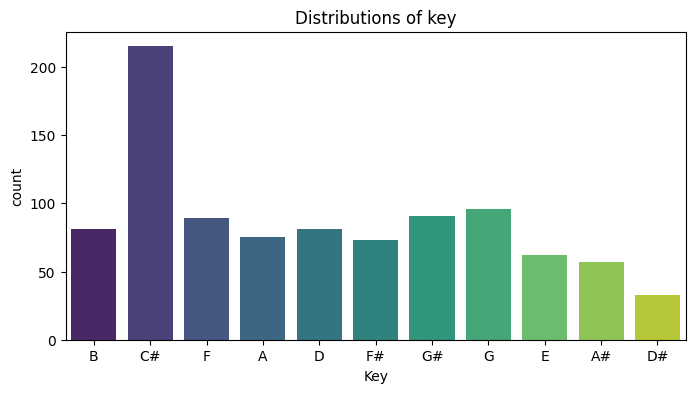

In [29]:
plt.figure(figsize = (8,4))
sns.countplot(x='key', data= data, palette = "viridis")
plt.title("Distributions of key")
plt.xlabel("Key")
plt.ylabel("count")
plt.show()

<font color="green">Identifying most popular mode:

<ipython-input-30-3042d1bcf5af>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='mode', data= data, palette = "viridis")


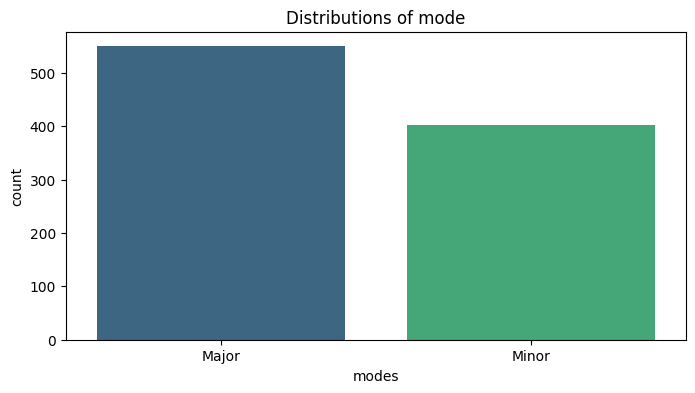

In [30]:
plt.figure(figsize = (8,4))
sns.countplot(x='mode', data= data, palette = "viridis")
plt.title("Distributions of mode")
plt.xlabel("modes")
plt.ylabel("count")
plt.show()

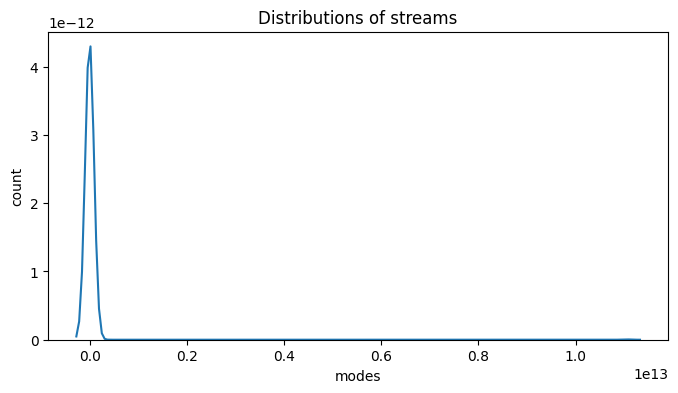

In [32]:
plt.figure(figsize = (8,4))
sns.kdeplot(x='streams', data= data)
plt.title("Distributions of streams")
plt.xlabel("modes")
plt.ylabel("count")
plt.show()

<font color="green">Convert and Extract Date Components

In [35]:
data['released_date'] = pd.to_datetime(data.rename(columns = { 'released_year': 'year', 'released_month':'month', 'released_day':'day' })[['year','month','day']])
data['released_date'].head(3)

,released_date
0,2023-07-14
1,2023-03-23
2,2023-06-30


<font color="green">Data Aggregation & Trend Analysis

In [80]:
data['day_name'] = data['released_date'].dt.day_name()
data['day_name'].value_counts()


,count
day_name,
Friday,526
Thursday,155
Wednesday,87
Tuesday,65
Monday,60
Sunday,37
Saturday,23


In [82]:
data['is_weekend'] = data['day_name'].apply(lambda x: 'Yes' if x in ['Saturday','Sunday'] else 'No')
data['is_weekend'].value_counts()

,count
is_weekend,
No,893
Yes,60


In [42]:
data['released_date'].dt.month.value_counts()

,count
released_date,
1,134
5,128
3,86
6,86
11,80
12,75
10,73
4,66
7,62


<ipython-input-59-c80a8f22de61>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'energy_%', data = data , palette = 'viridis')


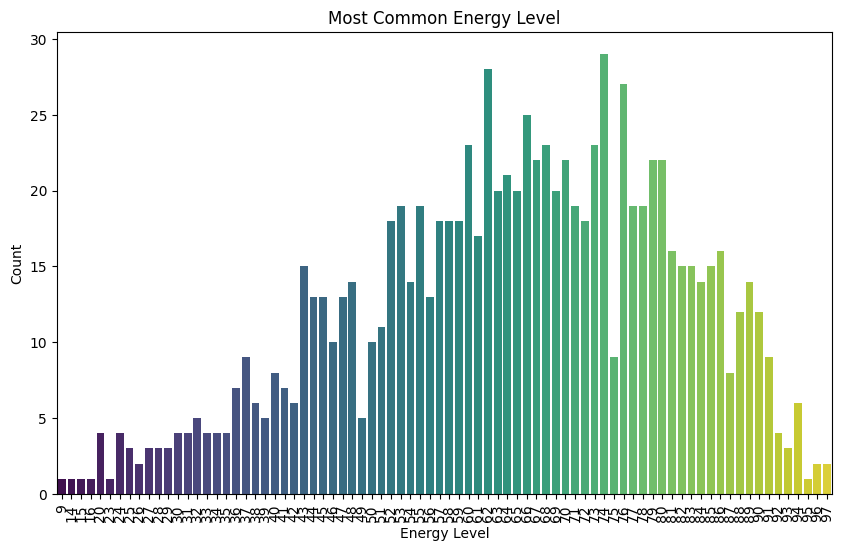

In [59]:

plt.figure(figsize = (10,6))
sns.countplot(x= 'energy_%', data = data , palette = 'viridis')
plt.title('Most Common Energy Level')
plt.xlabel('Energy Level')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

In [46]:
data['energy'] = data['energy_%'].apply(lambda x: "Low Energy" if x<=40 else("Energy" if x>40 and x<=70 else "High Energy"))
data['energy'].value_counts()

,count
energy,
Energy,495
High Energy,371
Low Energy,87


<ipython-input-61-00d6361abd73>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'valence_%', data = data , palette = 'viridis')


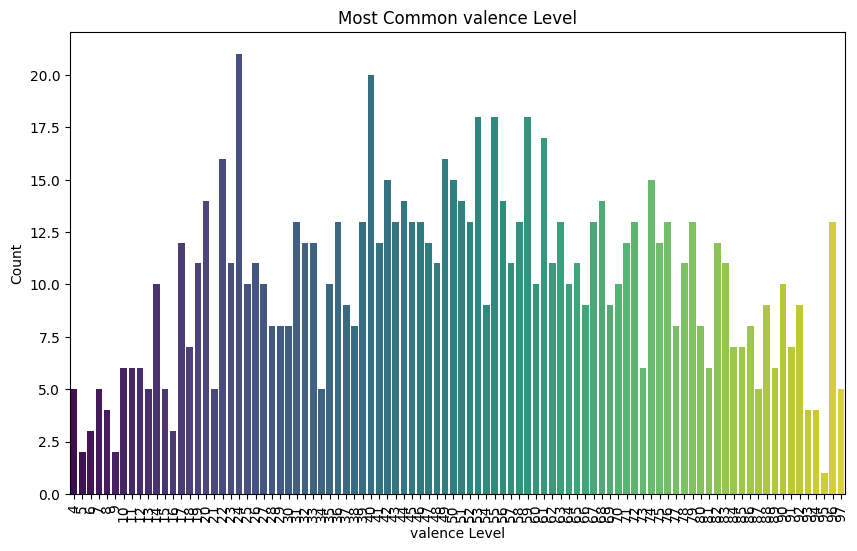

In [61]:

plt.figure(figsize = (10,6))
sns.countplot(x= 'valence_%', data = data , palette = 'viridis')
plt.title('Most Common valence Level')
plt.xlabel('valence Level')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

In [58]:
data['valence'] = data['valence_%'].apply(lambda x: "low valence" if x<=40 else("valence" if x>40 and x<=70 else "High valence"))
data['valence'].value_counts()

,count
valence,
valence,389
low valence,329
High valence,235


<font color="green">Identifying most popular Speechiness Level.</font>

<ipython-input-67-72083ee30db5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'speechiness_%', data = data , palette = 'viridis')


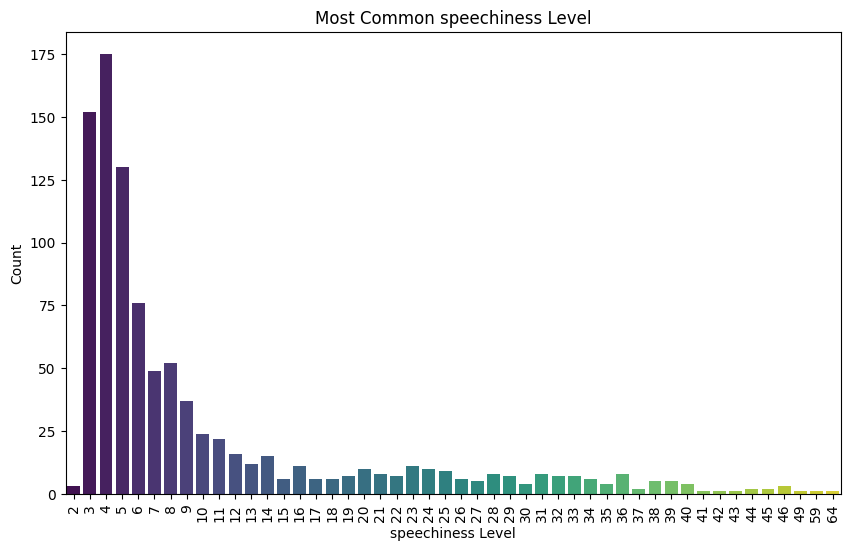

In [67]:
plt.figure(figsize = (10,6))
sns.countplot(x= 'speechiness_%', data = data , palette = 'viridis')
plt.title('Most Common speechiness Level')
plt.xlabel('speechiness Level')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

<font color="green">Creating decade's column:</font>

In [69]:
data['decade'] = data['released_year']//10 * 10

In [71]:
data['decade'].value_counts()

,count
decade,
2020,733
2010,151
2000,20
1990,14
1980,12
1950,9
1970,7
1960,4
1940,2


<font color="green">Converting bpm rates into bpm range:</font>

In [72]:
bins = [0, 60, 90, 120, 150, 180, 250]
labels = ['0–60', '61–90', '91–120', '121–150', '151–180', '181+']

# Step 2: Create a new binned column
data['bpm_range'] = pd.cut(data['bpm'], bins=bins, labels=labels, right=False)

<ipython-input-76-154471305ee5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'bpm_range', data = data , palette = 'viridis')


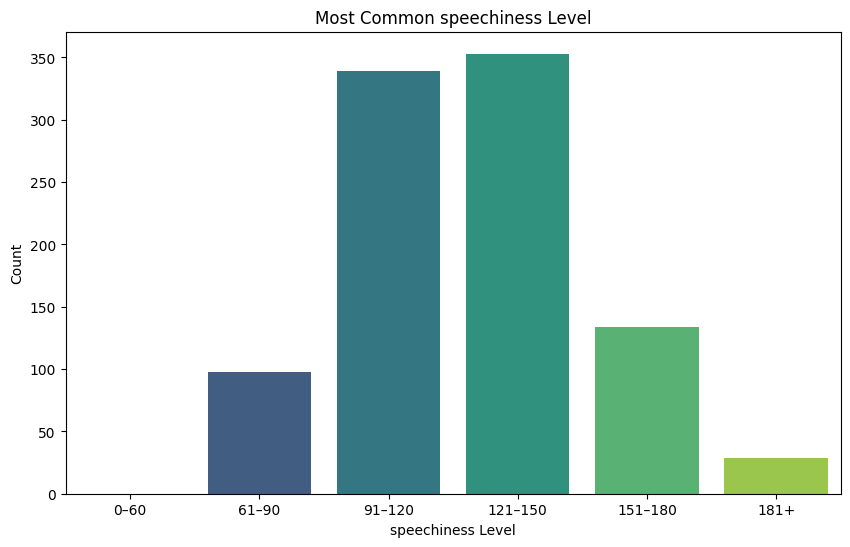

In [76]:
plt.figure(figsize = (10,6))
sns.countplot(x= 'bpm_range', data = data , palette = 'viridis')
plt.title('Most Common speechiness Level')
plt.xlabel('speechiness Level')
plt.ylabel('Count')
plt.show()

<font color="green">To categorize streams:</font>

In [88]:
data['popularity_category'] = data['streams'].apply(lambda x: "High Popular" if x >= 500000000 else("Moderate Popularity" if 100000000 <= x < 500000000 else "Low Popularity"))

In [89]:
data['popularity'].value_counts()

,count
popularity,
Popular,492
High Popular,309
Low Popular,152


<font color="green">Identify the Most Popular released year</font>

<ipython-input-91-5241898f21e4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'released_year', data = data , palette = 'viridis')


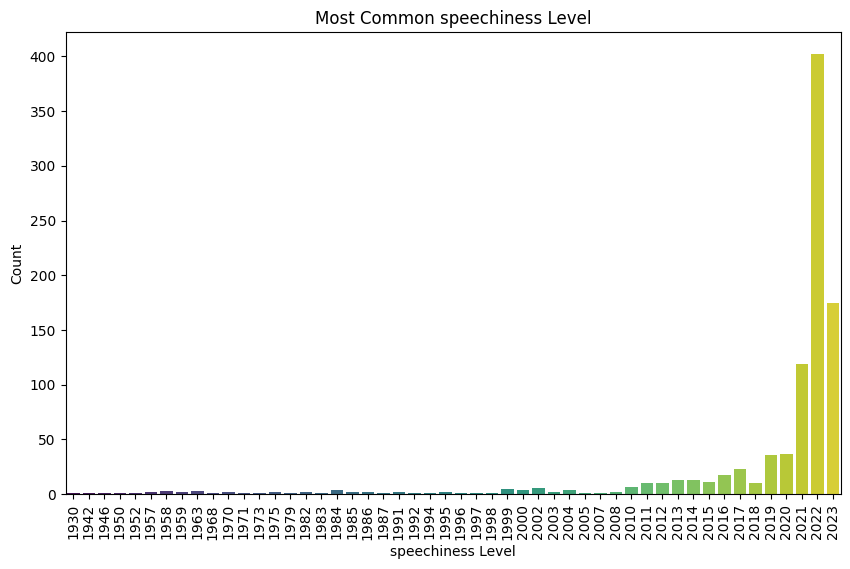

In [91]:
plt.figure(figsize = (10,6))
sns.countplot(x= 'released_year', data = data , palette = 'viridis')
plt.title('Most Common speechiness Level')
plt.xlabel('speechiness Level')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.show()

<font color="green"> Identify the Most Popular Release Quarter. Determine which quarter (Q1-Q4) has the highest number of song releases.

In [92]:
data['quarter'] = data['released_date'].dt.quarter

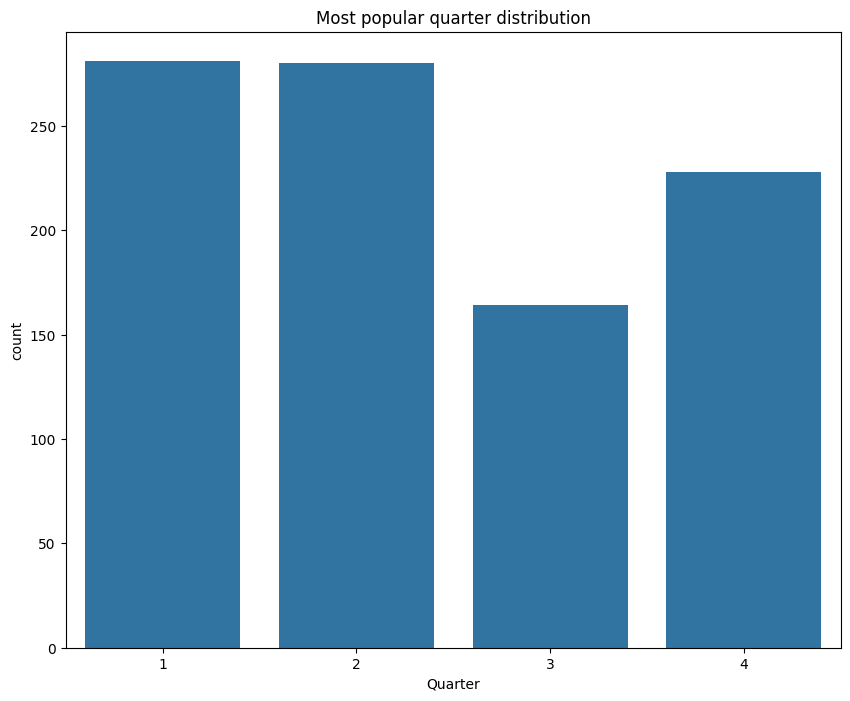

In [94]:
plt.figure(figsize = (10,8))
sns.countplot(x= 'quarter', data=data)
plt.title("Most popular quarter distribution")
plt.xlabel('Quarter')
plt.ylabel('count')
plt.show()